# _Capstone Project : The Battle Neighborhood_

```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

## _- For the ease of understandability I mention the table of contents that describes the project topics best :_

````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

## Table of Contents :

### 1 . Business Problem Section 
### 2 . Data Section
### 3 . Methodology Section
### 4 . Results & Discussions 
### 5 . Conclusion

``````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

### Business Problem Section :

New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.
New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.
The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.
With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc.
So as part of this project , we will list and visualize all major parts of New Delhi City .

Questions that can be asked using the above mentioned datasets

- What is best location in New Delhi City for Chinese Cuisine ?
- Which areas have large number of Chinese Resturant Market ?
- Which all areas have less number of resturant ?
- Which is the best place to stay if I prefer Chinese Cuisine ?
- What places are have best restaurant in New Delhi?

### Data Section :

For this project we need the following data :

- New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
- Data source : Zomato kaggel dataset : "https://www.kaggle.com/shrutimehta/zomato-restaurants-data"
- Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
- Nearby places in each locality of new delhi city.
- Data source : Fousquare API : "https://developer.foursquare.com/"
- Description : By using this api we will get all the venues in each neighborhood

### Methodology Section :

- Collect the new delhi city data from Zomato kaggel dataset
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

#### Installing and Importing libraries :

In [4]:
!pip install folium

     |████████████████████████████████| 93 kB 3.2 MB/s  eta 0:00:01


In [5]:
!pip install geocoder 

     |████████████████████████████████| 98 kB 8.8 MB/s  eta 0:00:01


In [6]:
import pandas as pd
import numpy as np
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans


import folium 

import geocoder

#### Readng the Data :

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [8]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

#### Data Cleaning :

In [9]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [10]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [11]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

#### Created map to show restaurants clusters :

In [12]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [13]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

#### What are the places with best restaurants in New Delhi ?

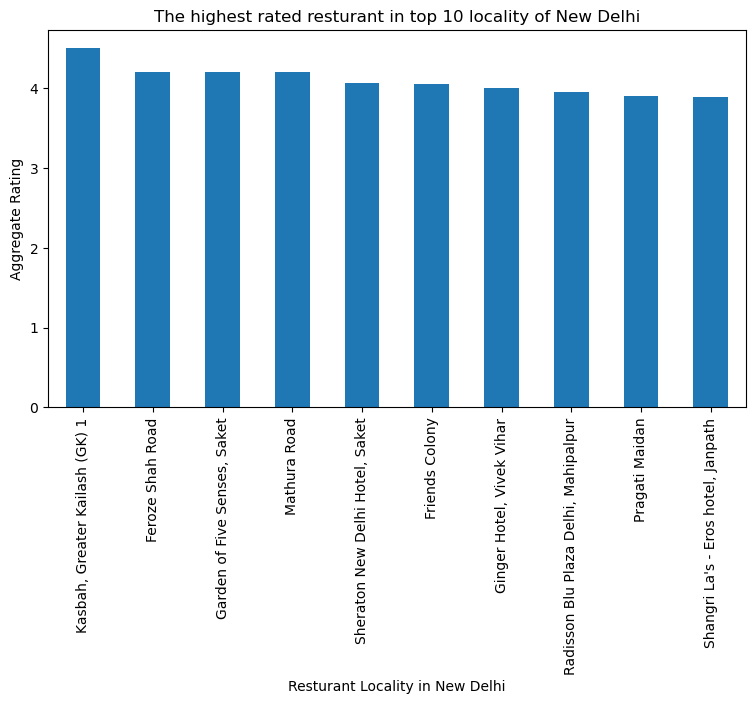

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

#### What places have low quality restaurants ?

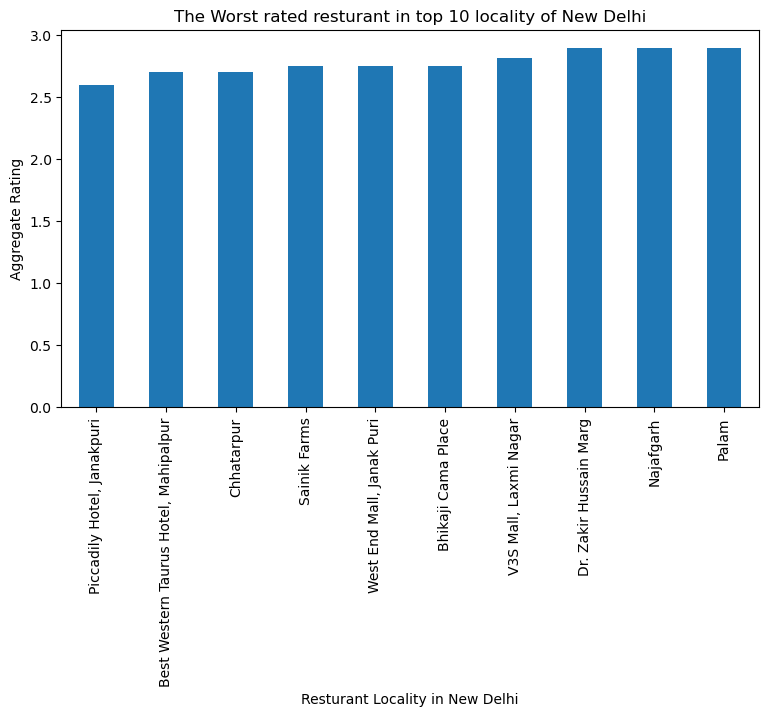

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

#### What places are suitable for edible person in Nwe Delhi City ?

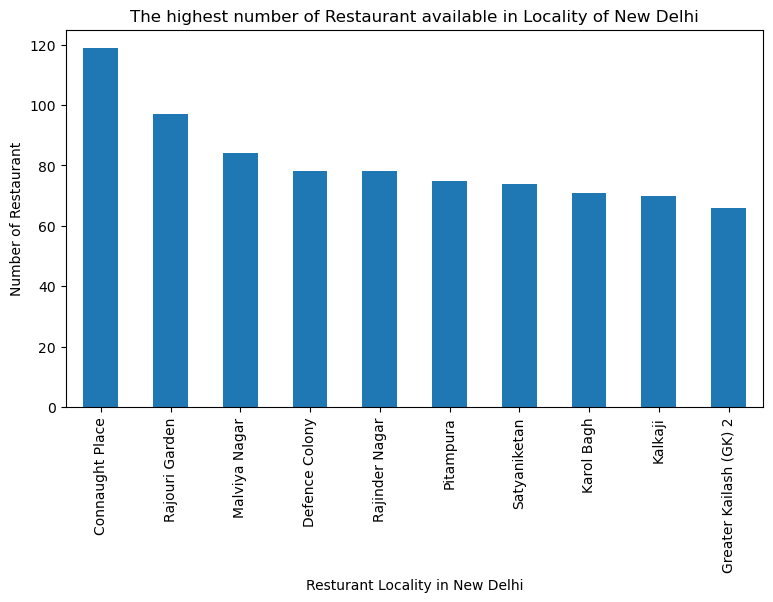

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

#### Which places are not suitable for edible person in the New Delhi City ?

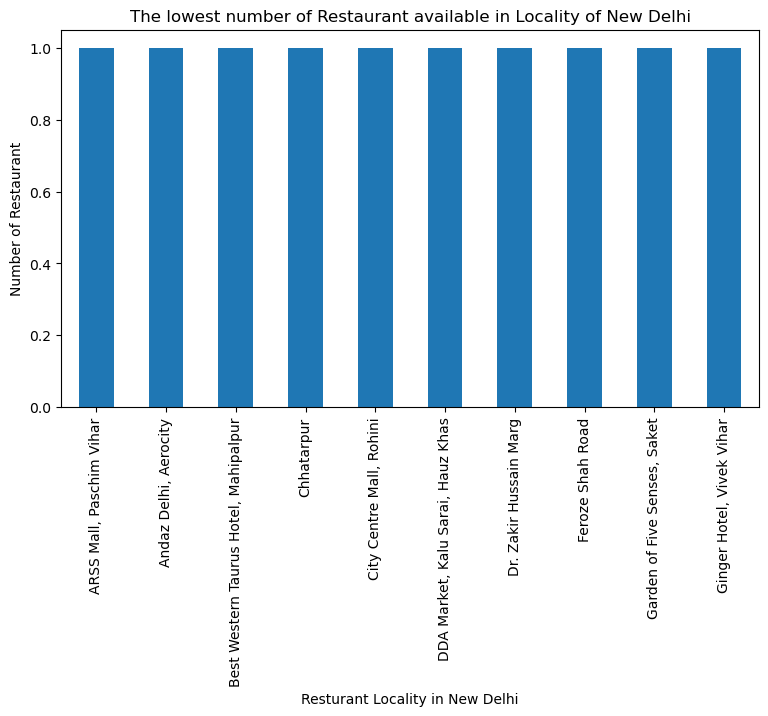

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

#### What are the best places for Chinese Restaurnts in New Delhi City ?

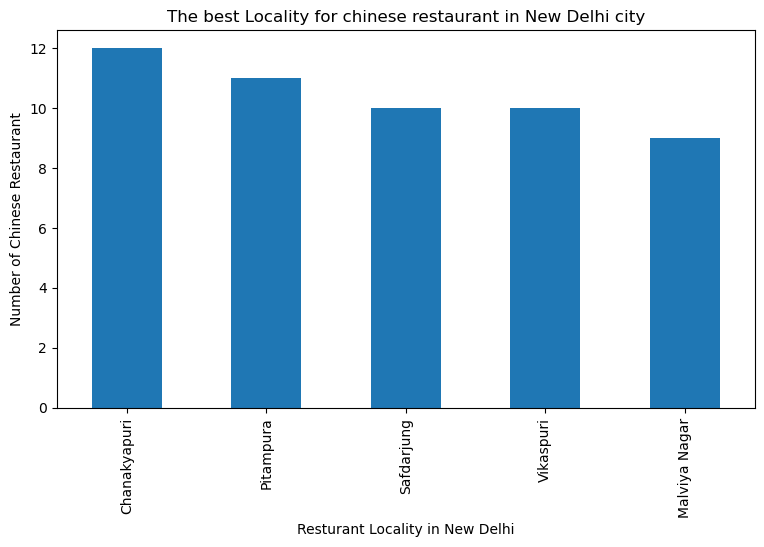

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

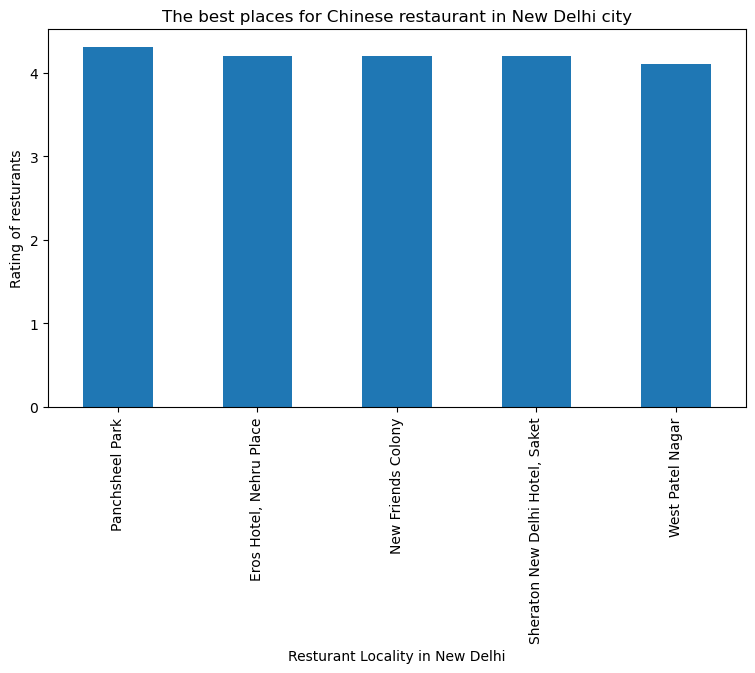

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

#### Data Transformation :

In [20]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [21]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [22]:
df_final.shape

(240, 8)

#### Defining Foursquare credentials and versions :

In [23]:
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


In [24]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Find the Venues in all New Delhi City :

In [27]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [28]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [29]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         7                   7      7   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 17                  17     17   
West Patel Nagar                                3                   3      3   
Worldmark 1, Aerocity                          30                  30     30   
Yusuf Sarai                                    14                  14     14   
ibis New Delhi, Aerocity                       28                  28     28   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      7                7   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              17               17   
West Patel Nagar                             3                3   
Worldmark 1, Aerocity                       30               30   
Yusuf Sarai                                 14               14   
ibis New Delhi, Aerocity                    28               28   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      7  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              17  
West Patel Nagar                             3  
Worldmark 1, Aerocity                       30  
Yusuf Sarai                                 14  
ibis New Delhi, Aerocity                    28  

[238 rows x 6 columns]

In [30]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 205 uniques categories.


In [31]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   Airport Food Court  Airport Lounge  Airport Service  Airport Terminal  \
0                   0               0                0                 0   
1                   0               0                0                 0   
2                   0               0                0                 0   
3                   0               0                0                 0   
4                   0               0                0                 0   

   American Restaurant  Arcade  ...  Toy / Game Store  Trail  Train Station  \
0                    0       0  ...                 0      0              0   
1                    0       0  ...                 0      0              0   
2                    0       0  ...                 0      0              0   
3                    0       0  ...                 0      0              0   
4                    0       0  ...                 0      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wings Joint  Women's Store  
0                      0           0            0              0  
1                      0           0            0              0  
2                      0           0            0              0  
3                      0           0            0              0  
4                      0           0            0              0  

[5 rows x 206 columns]

In [32]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
233  West Gate Mall, Rajouri Garden  0.000000           0.000000   
234                West Patel Nagar  0.000000           0.000000   
235           Worldmark 1, Aerocity  0.000000           0.033333   
236                     Yusuf Sarai  0.000000           0.000000   
237        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  Airport Food Court  Airport Lounge  Airport Service  \
0                  0.0                 0.0        0.000000              0.0   
1                  0.0                 0.0        0.000000              0.0   
2                  0.0                 0.0        0.000000              0.0   
3                  0.0                 0.0        0.142857              0.0   
4                  0.0                 0.0        0.000000              0.0   
..                 ...                 ...             ...              ...   
233                0.0                 0.0        0.000000              0.0   
234                0.0                 0.0        0.000000              0.0   
235                0.0                 0.0        0.000000              0.0   
236                0.0                 0.0        0.000000              0.0   
237                0.0                 0.0        0.000000              0.0   

     Airport Terminal  American Restaurant  Arcade  ...  Toy / Game Store  \
0            0.000000             0.000000     0.0  ...               0.0   
1            0.000000             0.000000     0.0  ...               0.0   
2            0.000000             0.000000     0.0  ...               0.0   
3            0.142857             0.000000     0.0  ...               0.0   
4            0.000000             0.000000     0.0  ...               0.0   
..                ...                  ...     ...  ...               ...   
233          0.000000             0.058824     0.0  ...               0.0   
234          0.000000             0.000000     0.0  ...               0.0   
235          0.000000             0.000000     0.0  ...               0.0   
236          0.000000             0.000000     0.0  ...               0.0   
237          0.000000             0.000000     0.0  ...               0.0   

     Trail  Train Station  Turkish Restaurant  Udupi Restaurant  \
0      0.0       0.000000                 0.0               0.0   
1      0.0       0.000000                 0.0               0.0   
2      0.0       0.000000                 0.0               0.0   
3      0.0       0.000000                 0.0               0.0   
4      0.0       0.000000                 0.0               0.0   
..     ...            ...                 ...               ...   
233    0.0       0.000000                 0.0               0.0   
234    0.0       0.000000                 0.0               0.0   
235    0.0       0.033333                 0.0               0.0   
236    0.0       0.000000                 0.0               0.0   
237    0.0       0.035714                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
233                 

In [33]:
New_Delhi_grouped.shape

(238, 206)

In [34]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant  0.22
1                             ATM  0.11
2                     Pizza Place  0.11
3  Multicuisine Indian Restaurant  0.11
4                  Sandwich Place  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.29
1               Café  0.29
2        Coffee Shop  0.14
3                Pub  0.14
4              Hotel  0.14


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1      Shopping Mall   0.2
2  Indian Restaurant   0.2
3          Multiplex   0.2
4               Café   0.1


----Aerocity----
                 venue  freq
0                Hotel  0.29
1  Rental Car Location  0.14
2          Coffee Shop  0.14
3       Airport Lounge  0.14
4     Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                  venue  freq
0           Pizza Place  0.25
1      Department Store  0.25
2     Indian Restauran

4   Convenience Store  0.08


----East Patel Nagar----
                  venue  freq
0           Pizza Place  0.15
1            Donut Shop  0.08
2  Fast Food Restaurant  0.08
3                   Bar  0.08
4         Metro Station  0.08


----East of Kailash----
                  venue  freq
0   Indie Movie Theater  0.12
1  Fast Food Restaurant  0.12
2                Temple  0.12
3           Coffee Shop  0.12
4      Department Store  0.12


----Epicuria Food Mall, Nehru Place----
                  venue  freq
0  Fast Food Restaurant  0.06
1    Chinese Restaurant  0.06
2     Indian Restaurant  0.06
3           Coffee Shop  0.06
4            Donut Shop  0.03


----Eros Hotel, Nehru Place----
                  venue  freq
0  Fast Food Restaurant  0.11
1           Coffee Shop  0.07
2            Donut Shop  0.04
3          Dessert Shop  0.04
4    Chinese Restaurant  0.04


----Essex Farms----
           venue  freq
0    Event Space  0.25
1    Coffee Shop  0.25
2      Nightclub  0.25
3  Metro 



----Lado Sarai----
                    venue  freq
0           Shopping Mall  0.33
1             Golf Course  0.17
2               BBQ Joint  0.17
3  Furniture / Home Store  0.17
4               Nightclub  0.17


----Lajpat Nagar 1----
               venue  freq
0  Indian Restaurant   0.2
1       Neighborhood   0.1
2             Arcade   0.1
3        Coffee Shop   0.1
4        Flea Market   0.1


----Lajpat Nagar 2----
                  venue  freq
0           Pizza Place  0.11
1     Indian Restaurant  0.11
2                  Café  0.07
3                Market  0.07
4  Fast Food Restaurant  0.07


----Lajpat Nagar 4----
                  venue  freq
0                  Café   0.2
1                Market   0.2
2   Indie Movie Theater   0.1
3                 Hotel   0.1
4  Fast Food Restaurant   0.1


----Lawrence Road----
                 venue  freq
0    Indian Restaurant  0.25
1     Basketball Court  0.25
2   Light Rail Station  0.25
3  Arts & Crafts Store  0.25
4                  AT

                   venue  freq
0                 Market  0.25
1      Indian Restaurant  0.25
2   Fast Food Restaurant  0.25
3            Snack Place  0.25
4  Performing Arts Venue  0.00


----Pragati Maidan----
          venue  freq
0          Pool  0.25
1  Hockey Arena  0.12
2        Museum  0.12
3          Café  0.12
4    Art Museum  0.12


----Prashant Vihar----
               venue  freq
0        Pizza Place  0.33
1  Indian Restaurant  0.33
2      Shopping Mall  0.17
3          Multiplex  0.17
4          Nightclub  0.00


----Preet Vihar----
                  venue  freq
0           Pizza Place  0.14
1        Ice Cream Shop  0.14
2    Chinese Restaurant  0.14
3  Fast Food Restaurant  0.14
4    Light Rail Station  0.14


----Premier Inn, Shalimar Bagh----
                venue  freq
0                Café   0.5
1               Hotel   0.5
2                 ATM   0.0
3      Nightlife Spot   0.0
4  Mughlai Restaurant   0.0


----Pride Plaza Hotel, Aerocity----
               venue  fre

        venue  freq
0  Steakhouse  0.17
1         Bar  0.17
2       Hotel  0.17
3  Restaurant  0.17
4      Market  0.17


----Uday Park----
           venue  freq
0    Pizza Place  0.12
1  Metro Station  0.12
2  Shopping Mall  0.12
3           Park  0.12
4    Music Venue  0.12


----Unity One Mall, Janakpuri----
                venue  freq
0      Sandwich Place  0.29
1         Pizza Place  0.14
2   Indian Restaurant  0.14
3         Coffee Shop  0.14
4  Chinese Restaurant  0.14


----Uttam Nagar----
               venue  freq
0  Indian Restaurant  0.67
1                ATM  0.33
2          Nightclub  0.00
3      Movie Theater  0.00
4      Moving Target  0.00


----V3S Mall, Laxmi Nagar----
                  venue  freq
0            Food Court  0.06
1  Fast Food Restaurant  0.06
2             Gift Shop  0.06
3             Multiplex  0.06
4           Pizza Place  0.06


----Vasant Kunj----
                           venue  freq
0                    Pizza Place  0.12
1                   De

In [35]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini     Indian Restaurant   
2     Aditya Mega Mall, Karkardooma         Shopping Mall   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura           Pizza Place   
..                              ...                   ...   
233  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
234                West Patel Nagar           Pizza Place   
235           Worldmark 1, Aerocity                 Hotel   
236                     Yusuf Sarai     Indian Restaurant   
237        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue  \
0          Sandwich Place                Market   
1                    Café                 Hotel   
2       Indian Restaurant           Pizza Place   
3     Rental Car Location  Fast Food Restaurant   
4        Department Store  Fast Food Restaurant   
..                    ...                   ...   
233     Indian Restaurant                  Café   
234  Fast Food Restaurant             Juice Bar   
235             Hotel Bar     Indian Restaurant   
236           Coffee Shop     Korean Restaurant   
237             Hotel Bar           Coffee Shop   

              4th Most Common Venue 5th Most Common Venue  \
0    Multicuisine Indian Restaurant           Pizza Place   
1                               Pub           Coffee Shop   
2                         Multiplex                 Hotel   
3                    Airport Lounge      Airport Terminal   
4                 Indian Restaurant    Airport Food Court   
..                              ...                   ...   
233                     Snack Place            Hookah Bar   
234          Furniture / Home Store    Frozen Yogurt Shop   
235                 Bed & Breakfast           Coffee Shop   
236            Fast Food Restaurant    Chinese Restaurant   
237               Indian Restaurant    Athletics & Sports   

    6th Most Common Venue   7th Most Common Venue   8th Most Common Venue  \
0             Coffee Shop      Chinese Restaurant                     ATM   
1    Fast Food Restaurant      Frozen Yogurt Shop     Fried Chicken Joint   
2                    Café    Fast Food Restaurant     Fried Chicken Joint   
3             Coffee Shop  Furniture / Home Store      Frozen Yogurt Shop   
4           Garden Center             Gaming Cafe  Furniture / Home Store   
..                    ...                     ...                     ...   
233                Garden               Multiplex            Dessert Shop   
234   Fried Chicken Joint       French Restaurant              Food Truck   
235         Shopping Mall                     Spa                  Bakery   
236                   Bar                  Lounge      Light Rail Station   
237             Gastropub              Restaurant         Bed & Breakfast   

    9th Most Common Venue 10th Most Common Venue  
0     American Restaurant         Discount Store  
1       French Restaurant             Food Truck  
2       French Restaurant             Food Truck  
3     Fried Chicken Joint      French Restaurant  
4      Frozen Yogurt Shop    Fried Chicken Joint  
..                    ...                    ...  
233           Pizza Place     Chinese Restaurant  
234            Food Court      Food & Drink Shop  
235    Punjabi Restaurant     Athletics & Sports  
236      Asian Restaurant                   Park  
237    Punjabi Restaurant                    Spa  

[238 rows x 11 columns]

In [37]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [38]:
# add clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               0   
1  Average, Good, Poor, Very Good         1560               0   
2                   Average, Good          434               0   
3                         Average           59               3   
4                         Average          126               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant        Sandwich Place                Market   
1     Indian Restaurant                  Café                 Hotel   
2         Shopping Mall     Indian Restaurant           Pizza Place   
3                 Hotel   Rental Car Location  Fast Food Restaurant   
4           Pizza Place      Department Store  Fast Food Restaurant   

            4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0  Multicuisine Indian Restaurant           Pizza Place           Coffee Shop   
1                             Pub           Coffee Shop  Fast Food Restaurant   
2                       Multiplex                 Hotel                  Café   
3                  Airport Lounge      Airport Terminal           Coffee Shop   
4               Indian Restaurant    Airport Food Court         Garden Center   

    7th Most Common Venue   8th Most Common Venue 9th Most Common Venue  \
0      Chinese Restaurant                     ATM   American Restaurant   
1      Frozen Yogurt Shop     Fried Chicken Joint     French Restaurant   
2    Fast Food Restaurant     Fried Chicken Joint     French Restaurant   
3  Furniture / Home Store      Frozen Yogurt Shop   Fried Chicken Joint   
4             Gaming Cafe  Furniture / Home Store    Frozen Yogurt Shop   

  10th Most Common Venue  
0         Discount Store  
1             Food Truck  
2             Food Truck  
3      French Restaurant  
4    Fried Chicken Joint

In [39]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
0    28.668945    3.100000                              Average          117   
1    28.537063    3.292308       Average, Good, Poor, Very Good         1560   
2    28.656131    3.275000                        Average, Good          434   
12   28.641698    3.050000                              Average           17   
13   28.690182    3.090000                  Average, Good, Poor          971   
16   28.630440    3.208333                  Average, Good, Poor         1779   
23   28.656414    3.358182             Average, Good, Very Good         6668   
33   28.657388    3.320000                        Average, Good          636   
42   28.576161    2.983333                  Average, Good, Poor          542   
43   28.643320    3.287500       Average, Good, Poor, Very Good         2570   
46   28.573241    3.225000                  Average, Good, Poor         1106   
47   28.681582    3.046875                  Average, Good, Poor         1224   
49   28.602169    2.900000                              Average            7   
55   28.617102    4.200000                            Very Good         3010   
61   28.668181    3.400000                              Average           33   
65   28.556980    3.272414                  Average, Good, Poor         5243   
71   28.641003    3.650000                        Average, Good          367   
76   28.576785    3.200000                        Average, Good          143   
77   28.631728    3.060714       Average, Good, Poor, Very Good         1650   
82   28.548371    3.137500                  Average, Good, Poor          609   
84   28.630942    3.122000       Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111             Average, Good, Very Good         7411   
92   28.584294    3.100000                              Average           35   
97   28.662972    3.533333                   Average, Very Good          293   
98   28.651527    3.490909             Average, Good, Very Good         3222   
99   28.648795    3.238028       Average, Good, Poor, Very Good         7282   
106  28.575525    3.126316                        Average, Good          998   
109  28.689561    3.311111                   Average, Very Good          903   
113  28.541242    2.984615                              Average          817   
114  28.584615    3.303571       Average, Good, Poor, Very Good         6480   
116  28.486576    2.950000                              Average            8   
118  28.646549    3.200000                              Average           20   
124  28.521760    4.200000                            Very Good          278   
126  28.602860    2.973214                  Average, Good, Poor         1831   
133  28.708185    3.344444             Average, Good, Very Good          568   
138  28.556145    3.040909                  Average, Good, Poor          637   
140  28.627959    3.004167                              Average          326   
144  28.591092    3.200000                  Average, Good, Poor          993   
147  28.523307    3.430769       Average, Good, Poor, Very Good         2412   
152  28.544464    3.525000                   Average, Very Good          231   
155  28.669160    3.148214                  Average, Good, Poor         2735   
159  28.613748    3.900000                   Average, Excellent         2313   
164  28.668055    3.393333  Average, Excellent, Good, Very Good         4670   
175  28.546931    3.223077                        Average, Good          606   
185  28.683364    3.000000                        Average, Good          586   
198  28.636712    3.023529                        Average, Poor          185   
200  28.564288    3.200000                              Average            6   
201  28.651299    3.500000                        Average, Good          479   
203  28.601187    3.633333                        Average, Good         1018   
208  28.562

In [41]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
6    28.527088    3.117391                  Average, Good, Poor         1012   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
9    28.659870    3.281481                        Average, Good         1309   
15   28.691136    3.390909             Average, Good, Very Good          485   
..         ...         ...                                  ...          ...   
228  28.596073    3.052941                        Average, Good          305   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   
231  28.637492    3.062264                  Average, Good, Poor         1253   
232  28.667344    3.077273                  Average, Good, Poor          939   
236  28.648177    3.675000             Average, Good, Very Good          876   

     Cluster Labels 1st Most Common Venue    2nd Most Common Venue  \
6                 1           Coffee Shop               Steakhouse   
7                 1           Coffee Shop                     Café   
8                 1               Stadium                     Café   
9                 1                  Café  South Indian Restaurant   
15                1           Pizza Place  South Indian Restaurant   
..              ...                   ...                      ...   
228               1           Snack Place     Gym / Fitness Center   
229               1                  Café                   Bakery   
231               1           Pizza Place     Fast Food Restaurant   
232               1             Juice Bar          Bed & Breakfast   
236               1           Pizza Place     Fast Food Restaurant   

    3rd Most Common Venue   4th Most Common Venue   5th Most Common Venue  \
6       Food & Drink Shop                  Market           Women's Store   
7           Shopping Mall    Fast Food Restaurant        Asian Restaurant   
8            Dessert Shop             Music Venue                   Hotel   
9            Burger Joint           Burrito Place           Women's Store   
15              BBQ Joint    Gym / Fitness Center       Fish & Chips Shop   
..                    ...                     ...                     ...   
228                  Café           Women's Store  Furniture / Home Store   
229              Tea Room               Pet Store             Cheese Shop   
231        Ice Cream Shop  Furniture / Home Store      Frozen Yogurt Shop   
232    Athletics & Sports           Women's Store             Flea Market   
236             Juice Bar  Furniture / Home Store      Frozen Yogurt Shop   

    6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
6       Fish & Chips Shop  Furniture / Home Store    Frozen Yogurt Shop   
7      Italian Restaurant          Clothing Store    Chinese Restaurant   
8    Other Great Outdoors             Golf Course           Coffee Shop   
9                    Food  Furniture / Home Store    Frozen Yogurt Shop   
15     Frozen Yogurt Shop     Fried Chicken Joint     French Restaurant   
..                    ...                     ...                   ...   
228    Frozen Yogurt Shop     Fried Chicken Joint     French Restaurant   
229    Italian Restaurant    Fast Food Restaurant            Food Truck   
231   Fried Chicken Joint       French Restaurant            Food Truck   
232           Gaming Cafe  Furniture / Home Store    Frozen Yogurt Shop   
236   Fried Chicken Joint       French Restaurant            Food Truck   

    9th Most Common Venue 10th Most Common Venue  
6     Fried Chicken Joint      French Restaurant  
7       Indian Restaurant              Bookstore  
8           Metro Station      French Restaurant  
9     Fried Chicken Joint      French Restaurant  
15             Food Truck             Food Court  
..                    ...                    ...  
228            Food Truck 

In [42]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating       Comments  No_of_Votes  Cluster Labels  \
146  28.53504       3.175  Average, Good           60               2   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
146    Italian Restaurant         Women's Store     Fish & Chips Shop   

    4th Most Common Venue   5th Most Common Venue 6th Most Common Venue  \
146           Gaming Cafe  Furniture / Home Store    Frozen Yogurt Shop   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
146   Fried Chicken Joint     French Restaurant            Food Truck   

    10th Most Common Venue  
146             Food Court

In [43]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
120  28.673708    3.133333                              Average          113   
128  28.608252    2.945000                        Average, Good          406   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
188  28.707685    3.168182             Average, Good, Very Good         1668   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
206  28.538993    3.450000                        Average, Good          242   
210  28.661133    3.775000                      Good, Very Good          460   
211  28.579556    3.780000                                 Good          709   
212  28.592147    3.350000                        Average, Good          189   
216  28.594859    3.800000                      Good, Very Good          287   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 3                 Hotel   Rental Car Location   
10                3                 Hotel     Indian Restaurant   
19                3                 Hotel       Bed & Breakfast   
25                3     Indian Restaurant   Japanese Restaurant   
35                3                 Hotel                Arcade   
56                3                 Hotel          Neighborhood   
60                3                 Hotel     Indian Restaurant   
69                3                 Hotel             Hotel Bar   
70                3                 Hotel            Restaurant   
72                3                 Hotel           Coffee Shop   
74                3                 Hotel     Indian Restaurant   
83                3                 Hotel             Hotel Bar   
111               3                 Hotel     Indian Restaurant   
112               3                 Hotel             Hotel Bar   
119               3                 Hotel     Indian Restaurant   
120               3     Indian Restaurant    Chinese Restaurant   
128               3                 Hotel                  Food   
149               3                 Hotel     Indian Restaurant   
161              

In [44]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
4    28.690020    3.033333                                    Average   
5    28.700516    3.040000                        Average, Good, Poor   
11   28.562580    3.750000                   Average, Good, Very Good   
14   28.693969    3.378571                              Average, Good   
18   28.696302    3.300000                              Average, Good   
22   28.654105    3.085714                                    Average   
24   28.649658    3.800000        Average, Excellent, Good, Very Good   
28   28.650254    3.166667                              Average, Good   
36   28.692546    3.480000                              Average, Good   
57   28.699837    3.376471                   Average, Good, Very Good   
66   28.699373    3.252174                              Average, Good   
87   28.582031    3.117143             Average, Good, Poor, Very Good   
90   28.642755    3.450000                              Average, Good   
94   28.538153    3.117143                        Average, Good, Poor   
95   28.681154    3.453448                   Average, Good, Very Good   
101  28.667644    3.300000                                    Average   
104  28.656263    3.097619                              Average, Good   
130  28.724100    3.133333                                    Average   
132  28.706295    3.256000                   Average, Good, Very Good   
142  28.693270    3.519149                   Average, Good, Very Good   
157  28.629505    2.600000                                    Average   
160  28.712975    3.066667                                    Average   
169  28.667261    3.200000                                    Average   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
180  28.534499    3.000000                        Average, Good, Poor   
192  28.526856    4.066667                                  Very Good   
193  28.569983    3.133333                        Average, Good, Poor   
195  28.527731    3.450000                              Average, Good   
218  28.552403    3.833333                            Good, Very Good   
224  28.636921    2.819231                        Average, Good, Poor   
230  28.658041    3.400000                                    Average   
233  28.695096    3.050000                                    Average   
234  28.630044    2.750000                              Average, Poor   

     No_of_Votes  Cluster Labels 1st Most Common Venue  \
4            126               4           Pizza Place   
5            594               4  Gym / Fitness Center   
11           875               4         Shopping Mall   
14          2343               4     Indian Restaurant   
18           415               4     Indian Restaurant   
22            80               4           Pizza Place   
24          1410               4     Indian Restaurant   
28          1217               4  Fast Food Restaurant   
36           948               4     Indian Restaurant   
57          2460               4           Pizza Place   
66           973               4           Snack Place   
87          2140               4  Fast Food Restaurant   
90           322               4  Fast Food Restaurant   
94          3642               4  Fast Food Restaurant   
95          5267               4        Breakfast Spot   
101          132               4           Pizza Place   
104          965               4           Pizza Place   
130          325               4      Asian Restaurant   
132         1717               4           Pizza Place   
142         7642               4     Indian Restaurant   
157           67               4        Sandwich Place   
160          121               4     Indian Restaurant   
169           76               4                 Hotel   
172        25637               4                  Café   
180          173               4                  Café   
192          802    

#### Results & Discussions :

First of all , We go through the business problem section to understand and collect information about the Delhi City .

We may discuss our results under two main perspectives.

First, we may examine them according to neighborhoods areas. Their we find the suitable location regarding the chinese cuisne in the New Delhi City of India . We majorly see the best suited location and the ideal near by useful places . Not upto this we see the areas with less facilitated restaurants and the areas with few number of restaurants . 

Second, we transform our data in order to define the Foursquare credentials and Version through whch we find all the possible cuisines in New Delhi city . Thereafter we use one hot encoding in order to analyze the each locality and finally creating the maps of that city and analyzed location using folium library . Finally the 5 clusters defines our results and conclusion in the form of suitable dataset .

#### Conclusions : 

- Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
- Pancsheel park, Nehru place have the best Chinese Resturant.
- Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
- Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.
- Cluster 1: It is most recommended for Indian Restaurants.
- Cluster 2: It is most recommended for Hotels and nightclub. 
- Cluster 3 and Cluster 5: It is most recommended for Fast food. 
- Cluster 4: It is most recommended for the cafe and pizza.


## THE END 

``````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````